In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

url_data = "https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/wages.csv"

data = pd.read_csv(url_data)
data.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


Variable de respuesta (dependiente, a predecir, etc) `earn`.

Características (predictores): `ed` (años de educación), `sex` (sexo), `age` (edad).

/home/mrrobot/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


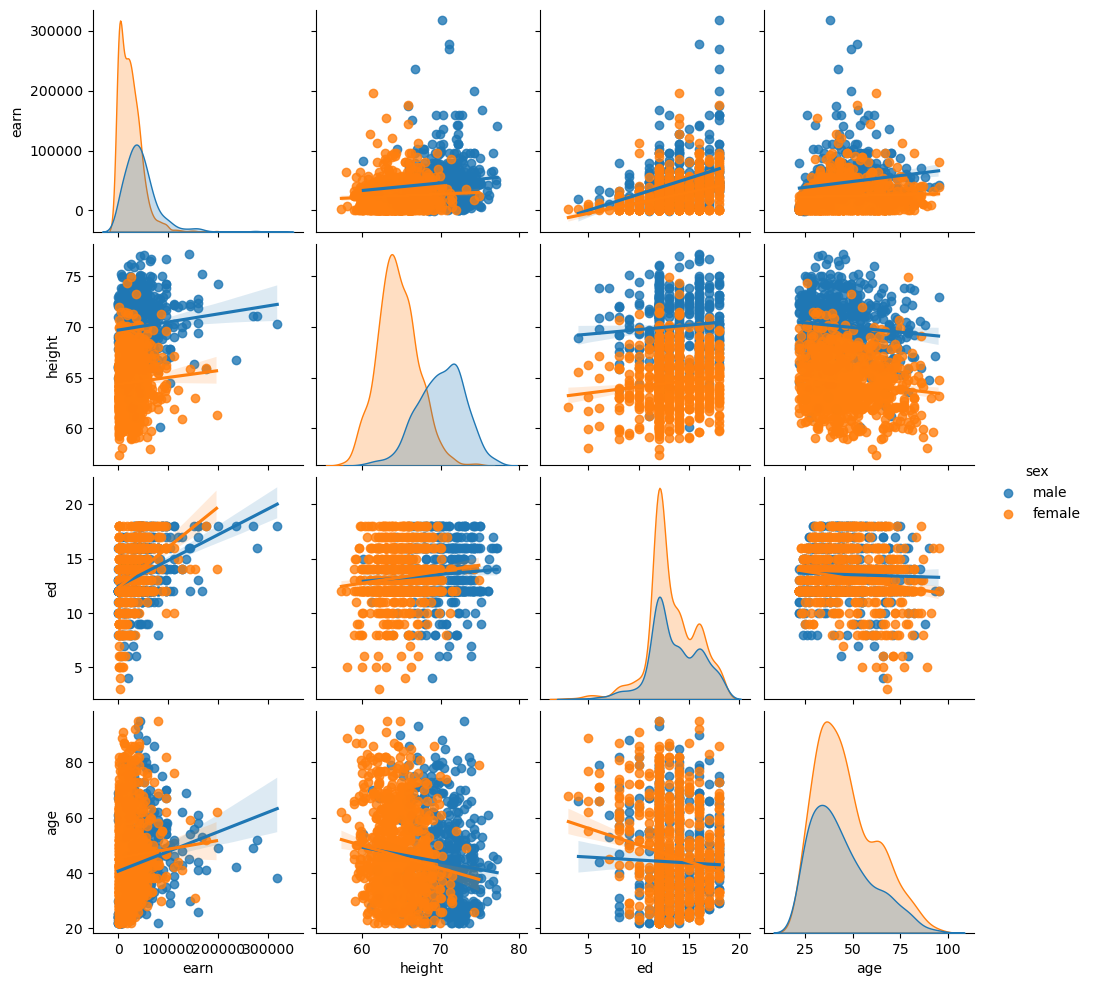

In [4]:
sns.pairplot(data, kind='reg', hue='sex')

Log-transformar `earn`

/home/mrrobot/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mrrobot/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


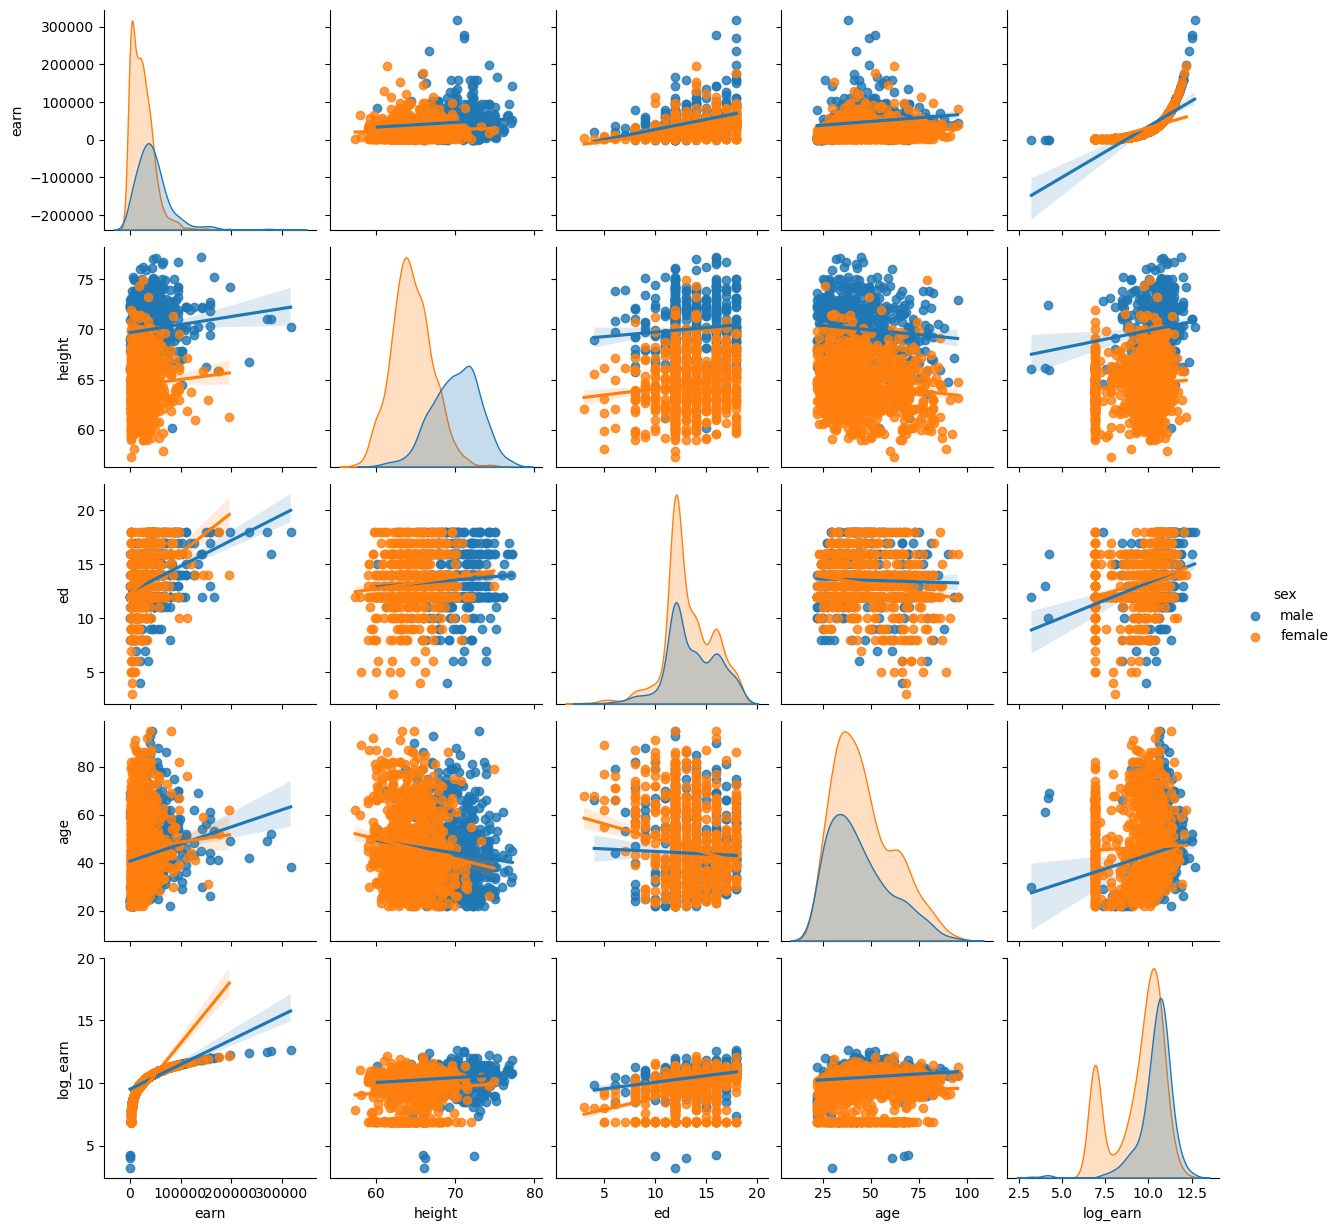

In [5]:
data['log_earn'] = np.log(data['earn'])
# volver a graficar
sns.pairplot(data, kind='reg', hue='sex')

$$\ln y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$$

$$\epsilon$$ es el término de error. Este modelo se conoce como log-lineal.

otras alternativas:

- lineal-lineal
- log-lineal (y es log transformada)
- log-log (tanto y como x son log transformadas)
- lin-log (solo x es log transformada)

In [6]:
# modelo 1: earn ~ ed
model1 = sm.OLS.from_formula("earn ~ ed", data=data)
# modelo 2: log_earn ~ ed
model2 = sm.OLS.from_formula("log_earn ~ ed", data=data)
result1 = model1.fit()
result2 = model2.fit()
# obtener AIC para comparar ambos modelos
print(result1.aic) # akaike-information criteria
print(result2.aic)

32281.117934149417
4670.862600156634


In [8]:
# modelo 3: log_earn ~ ed + age
model3 = sm.OLS.from_formula("log_earn ~ ed + age", data=data)
# modelo 4: log_earn ~ ed + age + sex
model4 = sm.OLS.from_formula("log_earn ~ ed + age + sex", data=data)
result3 = model3.fit()
result4 = model4.fit()
# obtener AIC para comparar ambos modelos
print(result3.aic) # akaike-information criteria
print(result4.aic)

4662.485163363645
4474.24418569059


In [9]:
print(result4.summary()) # r2 = 1 - RSS/TSS

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     121.2
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.32e-69
Time:                        21:03:37   Log-Likelihood:                -2233.1
No. Observations:                1368   AIC:                             4474.
Df Residuals:                    1364   BIC:                             4495.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8497      0.225     30.483      

$$\ln(y) = 6.84 + 0.99*sex_{male} + .16*ed+0.009*age$$
La categoría base es `female`. Su `x=0`.

$$\ln(y) = 6.84 + .16*ed+0.009*age$$

Para valores específicos de edad (35 años) y años de educación (17)

In [14]:
log_y_h = 6.84 +0.9929*1 + 0.16*17 + 0.009*35
log_y_m = 6.84 + 0.16*17 + 0.009*35
print(np.exp(log_y_h))
print(np.exp(log_y_m))

52464.918176068866
19438.287838802466


In [15]:
np.exp(log_y_h)/np.exp(log_y_m)

2.6990503799073835

In [16]:
np.exp(0.9929)

2.6990503799073866

In [20]:
new_data = pd.DataFrame({
    'ed': [17, 17],
    'age': [35, 35],
    'sex': ['male', 'female']
})

predicted_log_earn = result4.predict(new_data)

print(np.exp(predicted_log_earn)[0]/np.exp(predicted_log_earn)[1])

2.699091955861605


/home/mrrobot/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/mrrobot/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


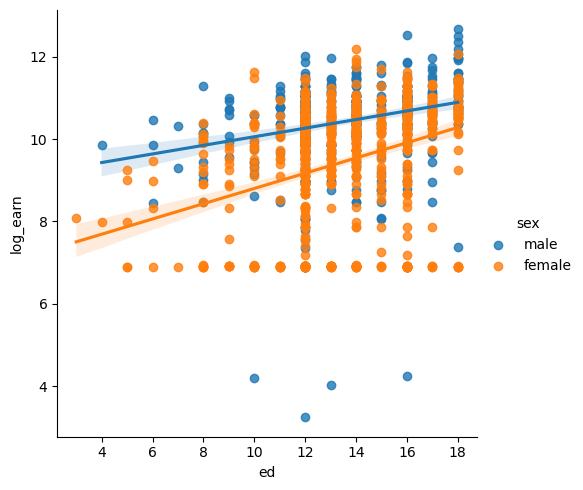

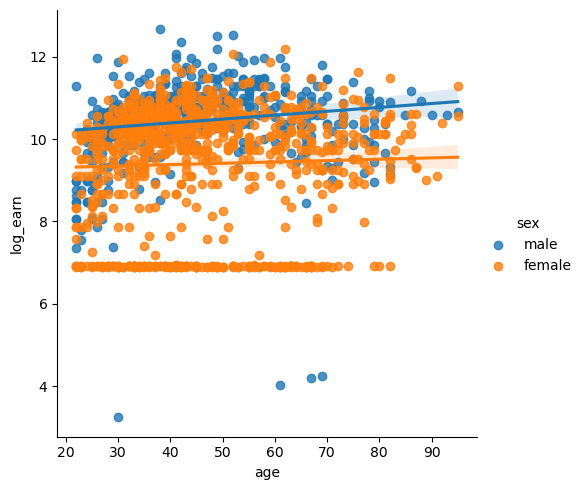

In [19]:
sns.lmplot(x='ed', y='log_earn', hue='sex', data=data)
sns.lmplot(x='age', y='log_earn', hue='sex', data=data)